In [1]:
import pandas as pd
from collections import Counter
from ast import literal_eval
import numpy as np
import simpledorff
import functions as f

import seaborn as sns
import matplotlib.pyplot as plt
import cmocean.cm as cmo

path = ".."

In [ ]:
import importlib
importlib.reload(f)

In [3]:
panel_bios = pd.read_csv(f'{path}/data/panel_bios_anonymized.tsv',
                         sep = "\t",
                        index_col=0, 
                        low_memory=False)

# separate hand coded bios
handcoded_bios = panel_bios[panel_bios['handcoded']==1].reset_index()
panel_bios = panel_bios[panel_bios['panel']==1].reset_index()

panel_bios["pronouns"] = panel_bios.pronouns.apply(literal_eval)
panel_bios = f.recode_genders(panel_bios)

In [4]:
decahose_bios = pd.read_csv(f'{path}/data/decahose_bios_anonymized.tsv',
                            sep = "\t",
                           index_col=0)
decahose_bios["pronouns"] = decahose_bios.pronouns.apply(literal_eval)

## Linguistic signals prevalence

In [5]:
def print_ling_prevalence(bios):
    n = len(bios)

    pronoun_genders = list(bios['pronoun_gender'])
    word_genders = list(bios['word_gender'])
    pronoun_word_genders = list(bios['pronoun_word_gender'])
    
    options_pronoun = {item for item in set(bios['pronoun_gender']) if item==item}
    print('PRONOUNS')
    for item in options_pronoun:
        print(f'   {item}: {pronoun_genders.count(item)/n:.2%}')
    count = len([item for item in pronoun_genders if item==item])
    print(f'Any pronoun: {count/n:.2%}')
    
    options_gend_term = {item for item in set(bios['word_gender']) if item==item}
    print('\nTERMS')
    for item in options_gend_term:
        print(f'   {item}: {word_genders.count(item)/n:.2%}')
    count = len([item for item in word_genders if item==item])
    print(f'Any gendered term: {count/n:.2%}')
    
    options_word_gend_term = {item for item in set(bios['pronoun_word_gender']) if item==item}
    print('\nPRONOUNS and TERMS')
    for item in options_word_gend_term:
        print(f'   {item}: {pronoun_word_genders.count(item)/n:.2%}')
    count = len([item for item in pronoun_word_genders if item==item])
    print(f'Any gendered term or pronoun: {count/n:.2%}')

In [6]:
print(f'Number of Panel bios: {len(panel_bios)}')
print(f'Number of Decahose bios: {len(decahose_bios)}')

Number of Panel bios: 581983
Number of Decahose bios: 2303526


In [7]:
print(f'Percentage of Panel bios with voter file sex: {len(panel_bios.loc[panel_bios.voter_file_sex.isin({"Female", "Male"})])/len(panel_bios)}')


Percentage of Panel bios with voter file sex: 0.9549746298431397


In [8]:
print("PANEL BIOS\n")
print_ling_prevalence(panel_bios)

PANEL BIOS

PRONOUNS
   Mixed_pro: 0.22%
   Female: 2.76%
   Male: 1.45%
   Non-binary: 0.15%
Any pronoun: 4.58%

TERMS
   Female: 9.76%
   Male: 7.26%
   Mixed_gen_word: 0.66%
   Non-binary: 0.01%
Any gendered term: 17.70%

PRONOUNS and TERMS
   Mixed_pro: 0.21%
   Different_pro_gen_words: 0.05%
   Male: 8.52%
   Mixed_gen_word: 0.65%
   Non-binary: 0.15%
   Female: 12.10%
Any gendered term or pronoun: 21.67%


In [9]:
print("DECAHOSE BIOS\n")
print_ling_prevalence(decahose_bios)

DECAHOSE BIOS

PRONOUNS
   Mixed_pro: 0.75%
   Female: 3.35%
   Male: 1.35%
   Non-binary: 0.41%
Any pronoun: 5.87%

TERMS
   Female: 2.36%
   Male: 2.74%
   Mixed_gen_word: 0.16%
   Non-binary: 0.02%
Any gendered term: 5.29%

PRONOUNS and TERMS
   Mixed_pro: 0.72%
   Different_pro_gen_words: 0.08%
   Male: 3.96%
   Mixed_gen_word: 0.15%
   Non-binary: 0.42%
   Female: 5.51%
Any gendered term or pronoun: 10.83%


In [10]:
n = len(panel_bios)
cnt = Counter(panel_bios.pronoun_gender)
val = (cnt["Mixed_pro"] + cnt["Non-binary"])
print(f'Non-binary or Mixed pronouns in panel: {val/n:.2%}')

Non-binary or Mixed pronouns in panel: 0.37%


In [11]:
n = len(decahose_bios)
cnt = Counter(decahose_bios.pronoun_gender)
val = (cnt["Mixed_pro"] + cnt["Non-binary"])
print(f'Non-binary or Mixed pronouns in decahose: {val/n:.2%}')

Non-binary or Mixed pronouns in decahose: 1.17%


## Appendix Table

In [12]:
### Appendix table
most_common_pro = ['she/her', 'he/him', 'she/her/hers', 'he/him/his',  'they/them', 'she/they', 'he/they', 
                   'she/hers', 'he/his', 'they/she', 'they/he']

def most_common_pro_prevalence(bios):
    
    n_bios = bios.shape[0]

    def pro_prevalence(pro_comb):
        return(sum(bios.pronouns.apply(lambda l: pro_comb in l))/n_bios)

    for pro in most_common_pro:
        print(f"Percentage with {pro}", f'{pro_prevalence(pro):.2%}')

In [13]:
print("Specific pronoun prevalence in panel bios \n")

most_common_pro_prevalence(panel_bios)

Specific pronoun prevalence in panel bios 

Percentage with she/her 2.42%
Percentage with he/him 1.21%
Percentage with she/her/hers 0.26%
Percentage with he/him/his 0.20%
Percentage with they/them 0.16%
Percentage with she/they 0.12%
Percentage with he/they 0.05%
Percentage with she/hers 0.04%
Percentage with he/his 0.03%
Percentage with they/she 0.02%
Percentage with they/he 0.01%


In [14]:
print("Specific pronoun prevalence in decahose bios \n")

most_common_pro_prevalence(decahose_bios)

Specific pronoun prevalence in decahose bios 

Percentage with she/her 3.21%
Percentage with he/him 1.27%
Percentage with she/her/hers 0.06%
Percentage with he/him/his 0.07%
Percentage with they/them 0.46%
Percentage with she/they 0.41%
Percentage with he/they 0.17%
Percentage with she/hers 0.01%
Percentage with he/his 0.01%
Percentage with they/she 0.06%
Percentage with they/he 0.04%


## Handcoded bios linguistic gender change

In [15]:
handcoded_bios = handcoded_bios.loc[~pd.isna(handcoded_bios.voter_file_sex)]
print(f"Number of handcoded bios without NA voter file sex {len(handcoded_bios)}")

Number of handcoded bios without NA voter file sex 4822


In [16]:
handcoded_bios = f.recode_genders(handcoded_bios)

def compare_measures(df, var1, var2):    
    matches = 0
    non_match = list()

    for i, row in df.iterrows():
        orig = row[var1]
        new = row[var2]

        genders = set([orig, new])

        if len(genders) == 1:
            matches += 1
        else:
            non_match.append((orig, new))         
    
    print(f'Total of {matches} matches {matches/len(df):.2%}\n')
    
    counts = Counter(non_match)    
    for key, value in counts.items():
        print(key[0],"->",key[1], value, f'{value/len(non_match):.2%}')
        
    return(counts, matches, non_match)

In [17]:
Counter(handcoded_bios.pronoun_word_gender_group)

Counter({nan: 2175,
         'Male': 1116,
         'Female': 1392,
         'Mixed': 108,
         'Non-binary': 31})

In [18]:
Counter(handcoded_bios.pronoun_word_gender_2023_group)

Counter({nan: 2324,
         'Male': 1036,
         'Female': 1304,
         'Mixed': 130,
         'Non-binary': 28})

In [19]:
Counter(handcoded_bios.pronoun_word_gender_2023_group)

Counter({nan: 2324,
         'Male': 1036,
         'Female': 1304,
         'Mixed': 130,
         'Non-binary': 28})

In [20]:
Counter(handcoded_bios.code_gender)

Counter({'Male': 2126,
         'Female': 2162,
         'Mixed': 396,
         'Not sure': 123,
         'Non-binary': 15})

In [21]:
print(f'{Counter(handcoded_bios.pronoun_word_gender)["Non-binary"]/len(handcoded_bios):.2%} of non-binary users using linguistic measures')

0.64% of non-binary users using linguistic measures


In [22]:
print(f'{Counter(handcoded_bios.code_gender)["Non-binary"]/len(handcoded_bios):.2%} of non-binary users using handcoding')

0.31% of non-binary users using handcoding


In [23]:
print("MATCHES BETWEEN 2021 LINGUISTIC GENDER AND 2023 LINGUISTIC GENDER FOR HANDCODED BIOS\n")

counts, match, non_match = compare_measures(handcoded_bios,
                          "pronoun_word_gender",
                          "pronoun_word_gender_2023")




MATCHES BETWEEN 2021 LINGUISTIC GENDER AND 2023 LINGUISTIC GENDER FOR HANDCODED BIOS

Total of 4370 matches 90.63%

Female -> nan 138 30.53%
nan -> Male 47 10.40%
Female -> Male 3 0.66%
Male -> nan 129 28.54%
Female -> Mixed_gen_word 6 1.33%
nan -> Female 65 14.38%
Mixed_gen_word -> nan 4 0.88%
Mixed_gen_word -> Male 3 0.66%
nan -> Mixed_gen_word 4 0.88%
Non-binary -> Mixed_pro 7 1.55%
Female -> Mixed_pro 13 2.88%
Different_pro_gen_words -> Male 1 0.22%
Non-binary -> Female 1 0.22%
Mixed_pro -> Male 1 0.22%
nan -> Mixed_pro 6 1.33%
nan -> Non-binary 3 0.66%
Mixed_pro -> Non-binary 4 0.88%
Male -> Female 2 0.44%
Male -> Different_pro_gen_words 1 0.22%
Male -> Mixed_gen_word 1 0.22%
Mixed_gen_word -> Female 1 0.22%
Mixed_pro -> nan 3 0.66%
Mixed_pro -> Female 1 0.22%
Different_pro_gen_words -> Female 2 0.44%
Non-binary -> nan 2 0.44%
Male -> Mixed_pro 2 0.44%
nan -> Different_pro_gen_words 2 0.44%


In [24]:
to_na = sum([val for key,val in counts.items() if pd.isna(key[1])])
from_na = sum([val for key,val in counts.items() if pd.isna(key[0])])

In [25]:
print(f'{to_na/len(non_match):.2%} of non matches went to NA' )

61.06% of non matches went to NA


In [26]:
print(f'{from_na/len(non_match):.2%} of non matches came from NA' )

28.10% of non matches came from NA


In [27]:
print(f'{(len(non_match)-(from_na + to_na))/len(non_match):.2%} of non matches are because of gender changing' )

10.84% of non matches are because of gender changing


In [28]:
print(f'{(len(non_match)-(from_na + to_na))} users changed gender' )

49 users changed gender


In [29]:
print(f'{49/len(handcoded_bios):.2%} of all handcoded users changed gender' )

1.02% of all handcoded users changed gender


## Matching between measures

In [30]:
print("MATCHES BETWEEN LINGUISTIC GENDER AND VOTER FILE SEX\n")

counts, match, non_match = compare_measures(panel_bios.loc[~pd.isna(panel_bios.pronoun_word_gender)],
                          "pronoun_word_gender",
                          "voter_file_sex")




MATCHES BETWEEN LINGUISTIC GENDER AND VOTER FILE SEX

Total of 109669 matches 86.96%

Mixed_pro -> Female 778 4.73%
Female -> Not sure 2320 14.11%
Male -> Female 3041 18.50%
Mixed_gen_word -> Not sure 108 0.66%
Female -> Male 3166 19.26%
Mixed_gen_word -> Male 1723 10.48%
Non-binary -> Not sure 59 0.36%
Male -> Not sure 1785 10.86%
Mixed_gen_word -> Female 1942 11.81%
Non-binary -> Male 288 1.75%
Non-binary -> Female 502 3.05%
Different_pro_gen_words -> Female 191 1.16%
Mixed_pro -> Male 360 2.19%
Different_pro_gen_words -> Male 97 0.59%
Different_pro_gen_words -> Not sure 9 0.05%
Mixed_pro -> Not sure 71 0.43%


In [31]:
cnt = Counter(non_match)

nonb_mixed = sum([val for key,val in cnt.items() if key[0] == "Mixed_pro" or key[0] == "Non-binary"])
print(f'{nonb_mixed/len(non_match):.2%} of non matches come from mixed or non binary pronoun users' )
print(f'{nonb_mixed} non matches come from mixed or non binary pronoun users' )
print(f'{nonb_mixed/len(panel_bios):.3%} of non matches come from mixed or non binary pronoun users, over the whole panel' )

mixed_gen = sum([val for key,val in cnt.items() if key[0] == "Mixed_gen_word"])
print(f'{mixed_gen/len(non_match):.2%} of non matches come from mixed gendered words' )

print(f'{sum([val for key,val in counts.items() if key[1]=="Not sure"])/len(non_match):.2%} of non matches come from Unknown' )


12.52% of non matches come from mixed or non binary pronoun users
2058 non matches come from mixed or non binary pronoun users
0.354% of non matches come from mixed or non binary pronoun users, over the whole panel
22.95% of non matches come from mixed gendered words
26.47% of non matches come from Unknown


In [32]:
print("MATCHES BETWEEN HANDCODED BIOS AND VOTER FILE SEX")

counts, match, non_match = compare_measures(handcoded_bios,
                          "code_gender",
                          "voter_file_sex")


MATCHES BETWEEN HANDCODED BIOS AND VOTER FILE SEX
Total of 4070 matches 84.40%

Female -> Not sure 81 10.77%
Mixed -> Female 194 25.80%
Mixed -> Male 172 22.87%
Not sure -> Male 70 9.31%
Male -> Female 28 3.72%
Male -> Not sure 90 11.97%
Female -> Male 31 4.12%
Not sure -> Female 41 5.45%
Mixed -> Not sure 30 3.99%
Non-binary -> Female 8 1.06%
Non-binary -> Male 6 0.80%
Non-binary -> Not sure 1 0.13%


In [33]:
cnt = Counter(non_match)

not_agree = sum([val for key,val in cnt.items() if key[0] == "Mixed" or key[0] == "Not sure"])
print(f'{not_agree/len(non_match):.2%} of non matches come from mixed or non binary pronoun users' )

unknown = sum([val for key,val in cnt.items() if key[1] == "Not sure"])
print(f'{unknown/len(non_match):.2%} of non matches come from Unknown voter file sex' )

male = sum([val for key,val in cnt.items() if key[1] == "Male"])
print(f'{male/len(non_match):.2%} of non matches come from Male voter file sex' )

female = sum([val for key,val in cnt.items() if key[1] == "Female"])
print(f'{female/len(non_match):.2%} of non matches come from Female voter file sex' )

67.42% of non matches come from mixed or non binary pronoun users
26.86% of non matches come from Unknown voter file sex
37.10% of non matches come from Male voter file sex
36.04% of non matches come from Female voter file sex


In [34]:
print("MATCHES BETWEEN HANDCODED BIOS AND LINGUISTIC SIGNALS")

handcoded_bios_flt = handcoded_bios.loc[~pd.isna(handcoded_bios.pronoun_word_gender)]

counts, match, non_match = compare_measures(handcoded_bios_flt,
                          "code_gender",
                          "pronoun_word_gender_group")

MATCHES BETWEEN HANDCODED BIOS AND LINGUISTIC SIGNALS
Total of 2236 matches 84.47%

Female -> Male 38 9.25%
Mixed -> Male 69 16.79%
Mixed -> Female 93 22.63%
Male -> Female 41 9.98%
Not sure -> Male 25 6.08%
Mixed -> Non-binary 15 3.65%
Female -> Mixed 46 11.19%
Male -> Mixed 39 9.49%
Not sure -> Female 21 5.11%
Not sure -> Non-binary 4 0.97%
Non-binary -> Female 3 0.73%
Female -> Non-binary 6 1.46%
Not sure -> Mixed 5 1.22%
Non-binary -> Mixed 5 1.22%
Male -> Non-binary 1 0.24%


## Krippendorf Heatmap

In [35]:
agreements = np.zeros((4,4))

vals = ['voter_file_sex', 
       'pronoun_word_gender_group', 
       'pronoun_word_gender_2023_group', 
       'code_gender']


for i, col_i in enumerate(vals):
    for j, col_j in enumerate(vals):
        
        if col_i != col_j:
            sub = handcoded_bios[['index', col_i, col_j]]
            
            sub = sub.loc[~pd.isna(sub[col_i])]
            sub = sub.loc[~pd.isna(sub[col_j])]


            codes = pd.melt(sub, 
                 id_vars='index', value_vars=[col_i, col_j],  
                 var_name='CodeType', value_name='Code')

            krip = simpledorff.calculate_krippendorffs_alpha_for_df(codes,experiment_col='index',
                                             annotator_col='CodeType',
                                             class_col='Code')
        
            agreements[i][j] = krip
        
        else:
            agreements[i][j] = 1
        

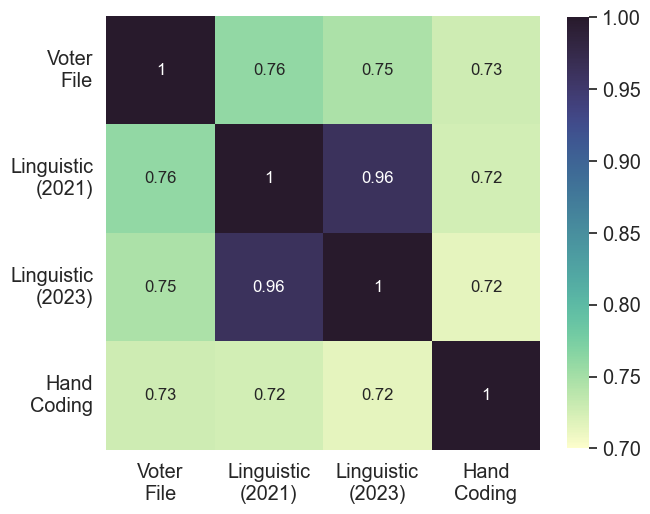

In [36]:
labels = ['Voter\nFile', 'Linguistic\n(2021)', 'Linguistic\n(2023)', 'Hand\nCoding']

plt.figure(figsize=(7,7))

sns.set(font_scale = 1.3)

sns.heatmap(agreements,
           annot=True,
           annot_kws={'size':12},
           square=True,
           vmin=0.7,
           vmax=1,
           cmap=cmo.deep,
           xticklabels=labels,
           yticklabels=labels,
           cbar_kws={"shrink": 0.8}
           )
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 

#plt.savefig(f'plots/heatmap.png',dpi=300, bbox_inches='tight')
plt.show()